#### For colab

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sys 
sh_path = './drive/MyDrive/Colab Notebooks/scripts'
sys.path.insert(0, sh_path)

#### For local development

In [1]:
import sys 
sh_path = '/home/mako/Documents/personal/tesis_mariana/code/scripts'
sys.path.insert(0, sh_path)

# Install dependencies and import thesis code

# Si esta próxima linea falla, ir a
#    Entorno de ejecucion > Reiniciar entorno de ejecucion
# y volver a correr estas primeras dos celdas
!sh '{sh_path}'/install_libraries.sh

In [2]:
from tests import *
from regression import *
%matplotlib inline
# Para elegir que modelo usar para regresión, descomentar la línea con el modelo
# que se quiera usar y comentar las otras dos. Despues correr la celda
REGRESS_MODEL = "LocalProjections" #o "VECM" o "OLS" o "LocalProjections"

# Load dfs

In [3]:
import pandas as pd
df_trimestral_crudo = pd.read_excel("https://github.com/mbarrena/tesis/blob/main/data/Data%20trimestral%201950%20a%202023%20con%20DUMMIES%20outliers%20(por%20trimestre).xlsx?raw=true")


In [4]:
df_Arg = df_trimestral_crudo.iloc[36:].reset_index(drop=True)[['año', 'trimestre', 'ipc_ajust', 'E', 'Ebc', 'pbird', 'impp_usa', 'Psoja_USA', 'Pmaíz_USA', 'Ptrigo_USA', 'TOTfmi']].copy()
df_Arg = df_trimestral_crudo.iloc[36:].reset_index(drop=True)[['año', 'trimestre', 'ipc_ajust', 'E', 'Ebc', 'pbird', 'impp_usa', 'Psoja_USA', 'Pmaíz_USA', 'Ptrigo_USA', 'TOTfmi']].copy()
df_Arg = renameColumnOfDataframe(df_Arg, "ipc_ajust", "ipc")

In [5]:
df_ERPT_Arg = df_Arg.copy()
df_ERPT_Arg = makeLogColumns(['ipc','E', 'Ebc', 'pbird', 'impp_usa', 'Psoja_USA', 'Pmaíz_USA', 'Ptrigo_USA', 'TOTfmi'],df_ERPT_Arg)
df_ERPT_Arg = makeDiffColumns(['ipc','E', 'Ebc', 'pbird', 'impp_usa', 'Psoja_USA', 'Pmaíz_USA', 'Ptrigo_USA', 'TOTfmi'],df_ERPT_Arg)
display(df_ERPT_Arg.head())

,año,trimestre,E,Ebc,pbird,impp_usa,Psoja_USA,Pmaíz_USA,Ptrigo_USA,TOTfmi,ipc
1,1959,2ºTr,0.246097,0.220782,0.030592,0.001061,2.889447e-02,0.097341,0.003831,NaN,0.242291
2,1959,3ºTr,-0.017487,0.011635,-0.094753,0.002119,-6.369500e-02,-0.029414,-0.011539,NaN,0.132732
3,1959,4ºTr,-0.011363,-0.016617,0.069152,0.014706,-3.378382e-03,-0.124785,0.032353,NaN,0.053472
4,1960,1ºTr,-0.002409,0.002615,0.044745,0.002083,1.344558e-02,0.024057,0.011173,NaN,0.060550
5,1960,2ºTr,0.000804,0.001886,0.006553,0.001040,-2.220446e-16,0.064250,-0.007435,NaN,0.003403


# Regress

In [6]:
import regression
#regression.REGRESS_MODEL = 'LocalProjections'
regression.REGRESS_MODEL = 'VAR'

In [7]:
regression.run_test_select_order(endog=["E","ipc","pbird"], data=df_ERPT_Arg, exog=["Pmaíz_USA"])

!!!! Modelo seleccionado: VAR
!!!! Modelo seleccionado: VAR
Creando modelo con estacionalidad...
año None trimestre
     Pmaíz_USA  s(1,4)  s(2,4)  s(3,4)  s(4,4)
0     0.097341     1.0     0.0     0.0     0.0
1    -0.029414     0.0     1.0     0.0     0.0
2    -0.124785     0.0     0.0     1.0     0.0
3     0.024057     0.0     0.0     0.0     1.0
4     0.064250     1.0     0.0     0.0     0.0
..         ...     ...     ...     ...     ...
254  -0.097769     0.0     0.0     1.0     0.0
255   0.027219     0.0     0.0     0.0     1.0
256  -0.019077     1.0     0.0     0.0     0.0
257  -0.139559     0.0     1.0     0.0     0.0
258  -0.176048     0.0     0.0     1.0     0.0

[259 rows x 5 columns]
Selected orders are: {'aic': np.int64(5), 'bic': np.int64(2), 'hqic': np.int64(2), 'fpe': np.int64(5)}


/home/mako/Documents/personal/tesis_mariana/code/scripts/variable_preprocessing.py:61: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  return pd.PeriodIndex(year=anios, quarter=trim, freq="Q"), "Q"
/home/mako/.pyenv/versions/3.12.5/envs/tesis_mariana/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:595: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = to_offset(freq)


,AIC,BIC,FPE,HQIC
0,-14.51,-14.26,4.993e-07,-14.41
1,-15.42,-15.04,2.013e-07,-15.27
2,-15.69,-15.18*,1.539e-07,-15.48*
3,-15.69,-15.06,1.535e-07,-15.44
4,-15.67,-14.92,1.560e-07,-15.37
5,-15.71*,-14.83,1.509e-07*,-15.35
6,-15.66,-14.66,1.577e-07,-15.26


!!!! Modelo seleccionado: VAR
!!!! Modelo seleccionado: VAR
Realizando regresión con modelo VAR
año None trimestre
     s(1,4)  s(2,4)  s(3,4)  s(4,4)
0       1.0     0.0     0.0     0.0
1       0.0     1.0     0.0     0.0
2       0.0     0.0     1.0     0.0
3       0.0     0.0     0.0     1.0
4       1.0     0.0     0.0     0.0
..      ...     ...     ...     ...
254     0.0     0.0     1.0     0.0
255     0.0     0.0     0.0     1.0
256     1.0     0.0     0.0     0.0
257     0.0     1.0     0.0     0.0
258     0.0     0.0     1.0     0.0

[259 rows x 4 columns]
Selected orders are: {'aic': np.int64(3), 'bic': np.int64(2), 'hqic': np.int64(2), 'fpe': np.int64(3)}


/home/mako/Documents/personal/tesis_mariana/code/scripts/variable_preprocessing.py:61: FutureWarning: Constructing PeriodIndex from fields is deprecated. Use PeriodIndex.from_fields instead.
  return pd.PeriodIndex(year=anios, quarter=trim, freq="Q"), "Q"
/home/mako/.pyenv/versions/3.12.5/envs/tesis_mariana/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:595: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = to_offset(freq)


,AIC,BIC,FPE,HQIC
0,-21.74,-21.46,3.629e-10,-21.62
1,-22.99,-22.49,1.038e-10,-22.79
2,-23.24,-22.51*,8.079e-11,-22.95*
3,-23.28*,-22.33,7.798e-11*,-22.89
4,-23.26,-22.08,7.942e-11,-22.79
5,-23.23,-21.83,8.178e-11,-22.67
6,-23.18,-21.56,8.647e-11,-22.52


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 02, Mar, 2025
Time:                     16:12:10
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -22.5341
Nobs:                     257.000    HQIC:                  -22.9635
Log likelihood:           1581.24    FPE:                7.97682e-11
AIC:                     -23.2522    Det(Omega_mle):     6.54798e-11
--------------------------------------------------------------------
Results for equation impp_usa
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.002732              NAN              NAN             NAN
s(1,4)              0.003068              NAN              NAN             NAN
s(2,4)             -0.003798              NAN              NAN   

/home/mako/.pyenv/versions/3.12.5/envs/tesis_mariana/lib/python3.12/site-packages/statsmodels/tsa/vector_ar/var_model.py:1558: RuntimeWarning: invalid value encountered in sqrt
  stderr = np.sqrt(np.diag(self.cov_params()))


**Pvalues:**

,const,"s(1,4)","s(2,4)","s(3,4)","s(4,4)",L1.impp_usa,L1.E,L1.ipc,L1.pbird,L2.impp_usa,L2.E,L2.ipc,L2.pbird
impp_usa,NaN,NaN,NaN,NaN,NaN,5.933506e-20,0.45408,0.788738,0.716612,0.064802,0.669295,0.199811,0.807345


**Impulso-respuesta:**

Sigma impp_usa: 0.0005295308953716208
Cum effect impp_usa (impulso) - ipc (respuesta): [-0.73616937 -0.77415458 -0.540872   -0.32055776 -0.05702979  0.15567237
  0.34736487  0.51235372  0.65636098  0.78237867  0.89244572  0.98877204
  1.07297587  1.14660328  1.21096944  1.26723806  1.3164276   1.35942792
  1.39701798  1.42987836  1.45860419]
Sigma impp_usa: 0.0005295308953716208
Cum effect impp_usa (impulso) - E (respuesta): [-1.72091696 -2.12497624 -2.04933086 -1.88126085 -1.68785439 -1.5408854
 -1.39963285 -1.27623192 -1.16557609 -1.06767491 -0.9815979  -0.90602538
 -0.83988804 -0.78201872 -0.73141757 -0.68717579 -0.64849741 -0.61468436
 -0.58512496 -0.55928451 -0.5366952 ]
Sigma E: 0.03878803587801688
Cum effect E (impulso) - ipc (respuesta): [0.47803315 0.99523161 1.27991598 1.61202262 1.86170945 2.09152569
 2.28905172 2.46170583 2.61292789 2.74483246 2.86025522 2.96110061
 3.04926808 3.12633831 3.19371015 3.25260549 3.30408993 3.34909658
 3.38844028 3.42283367 3.45289958]
Sigma ip

/home/mako/.pyenv/versions/3.12.5/envs/tesis_mariana/lib/python3.12/site-packages/statsmodels/tsa/vector_ar/plotting.py:208: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True,


Cum effect pbird (impulso) - E (respuesta): [ 0.         -0.75097094 -1.1739307  -1.36974417 -1.38265911 -1.39055614
 -1.3675147  -1.34284085 -1.3174958  -1.29379748 -1.2726572  -1.25379727
 -1.23722736 -1.22266948 -1.20991943 -1.19876114 -1.18900078 -1.18046628
 -1.17300435 -1.16648085 -1.16077792]
Sigma impp_usa: 0.0005295308953716208
Cum effect impp_usa (impulso) - pbird (respuesta): [0.2865633  0.32805113 0.38239159 0.4222654  0.43563777 0.43992877
 0.44017322 0.43969093 0.4390437  0.43844252 0.43792056 0.43745447
 0.43704317 0.4366787  0.43635775 0.43607595 0.43582903 0.43561297
 0.435424   0.43525878 0.43511433]
Sigma E: 0.03878803587801688
Cum effect E (impulso) - pbird (respuesta): [-0.03639426 -0.05675371 -0.06191031 -0.06936827 -0.07164449 -0.07387414
 -0.07517309 -0.07619193 -0.07702663 -0.0777122  -0.07830803 -0.07881995
 -0.07926627 -0.07965506 -0.07999443 -0.0802909  -0.08054993 -0.08077633
 -0.08097422 -0.0811472  -0.08129841]
Sigma ipc: 0.014943957101332409
Cum effect i

**Resultados descomposición de varianza (FEVD)**

FEVD for impp_usa
     impp_usa         E       ipc     pbird
0    1.000000  0.000000  0.000000  0.000000
1    0.997074  0.002521  0.000059  0.000346
2    0.992474  0.003018  0.003781  0.000728
3    0.991017  0.003726  0.004524  0.000733
4    0.989254  0.004782  0.005190  0.000774
5    0.987365  0.006364  0.005471  0.000800
6    0.985834  0.007705  0.005649  0.000812
7    0.984608  0.008806  0.005770  0.000816
8    0.983663  0.009664  0.005856  0.000817
9    0.982939  0.010321  0.005922  0.000818

FEVD for E
     impp_usa         E       ipc     pbird
0    0.040431  0.959569  0.000000  0.000000
1    0.033479  0.948708  0.010090  0.007723
2    0.031068  0.938188  0.021322  0.009423
3    0.029433  0.940782  0.020481  0.009304
4    0.028871  0.939105  0.023002  0.009021
5    0.028343  0.938721  0.024139  0.008797
6    0.028026  0.938112  0.025210  0.008651
7    0.027790  0.937621  0.026044  0.008545
8    0.027621  0.937255  0.026657  0.008468
9    0.027496  0.936958  0.027135  0.008411

F

**Test whiteness:**

Adjusted Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 6 is zero. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
         104.3          83.68   0.001 64
----------------------------------------



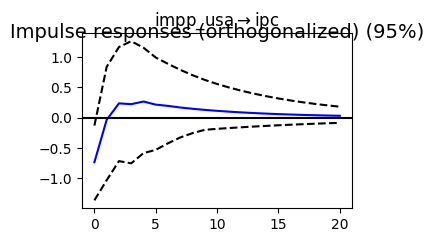

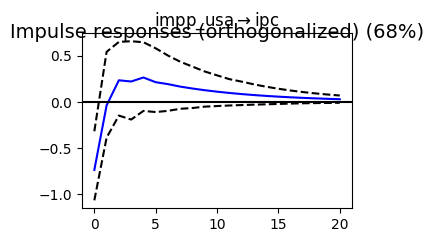

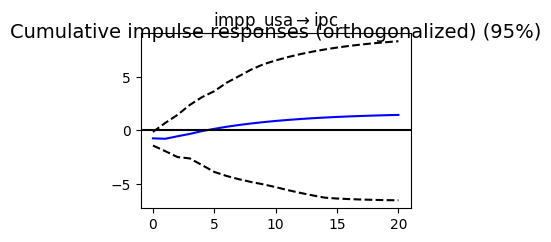

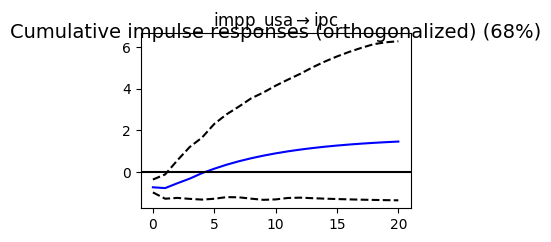

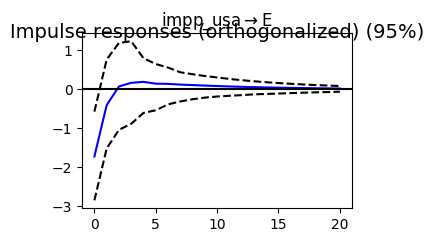

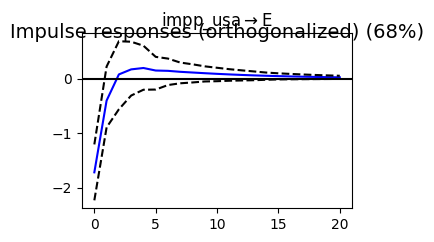

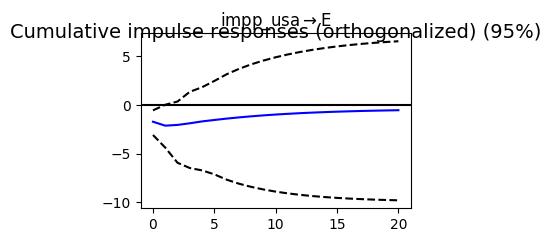

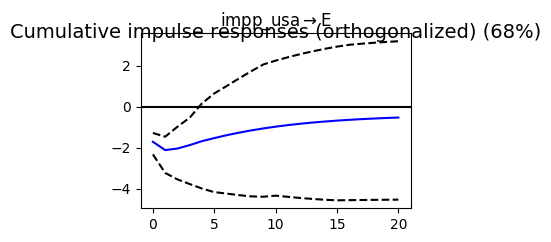

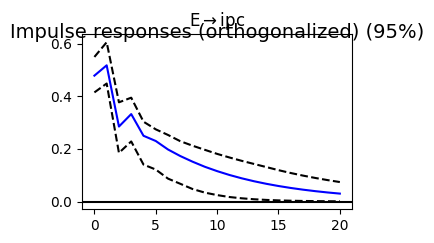

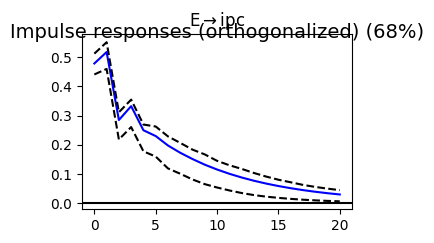

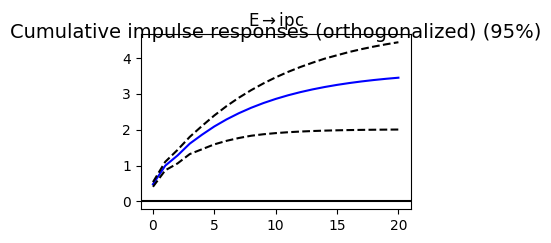

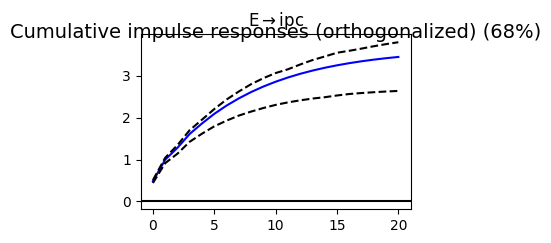

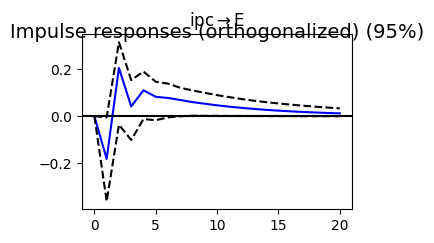

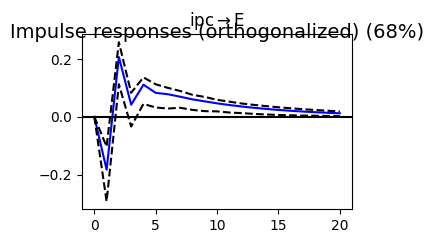

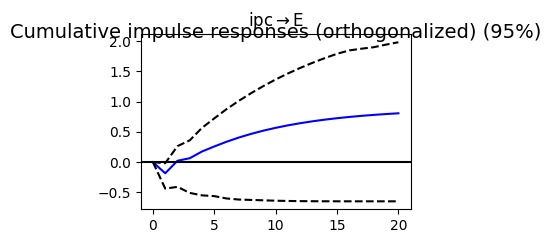

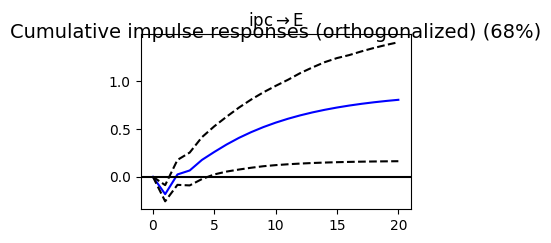

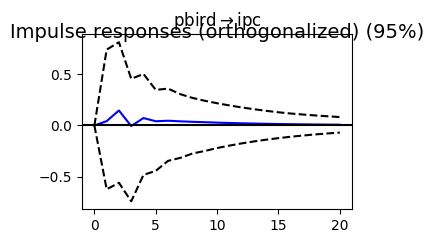

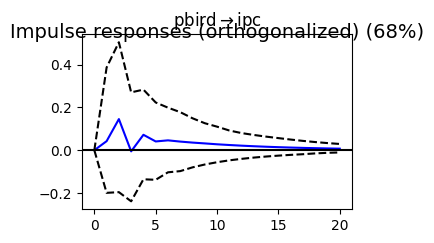

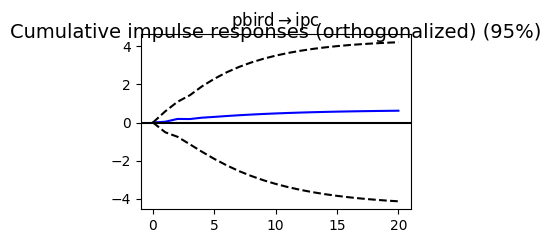

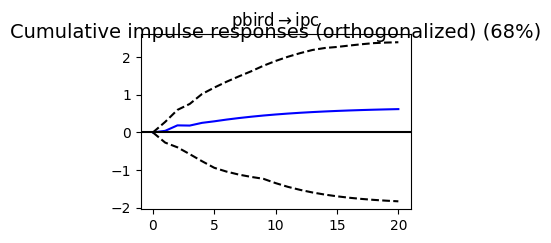

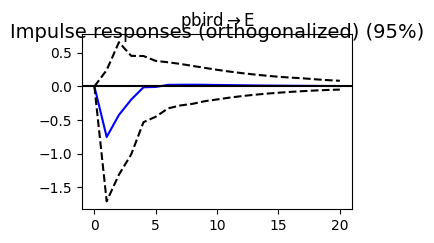

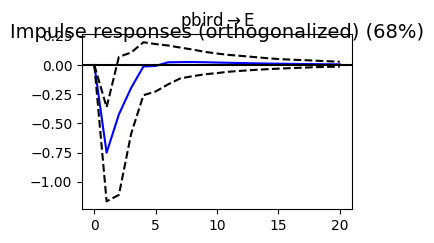

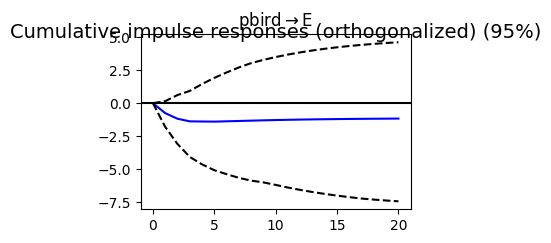

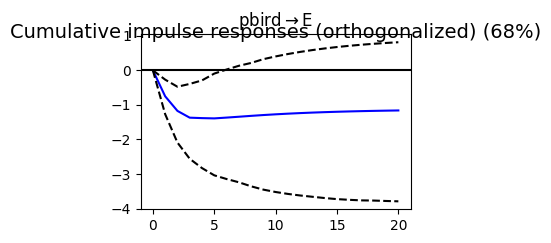

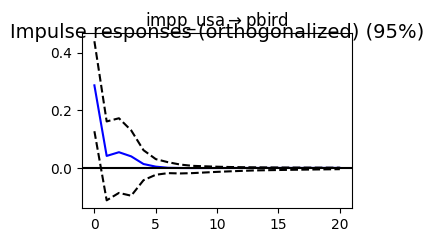

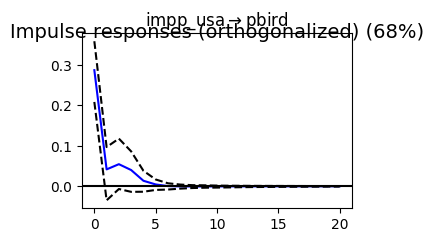

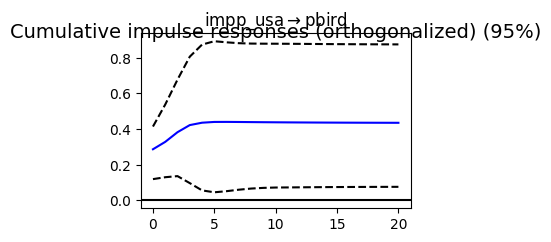

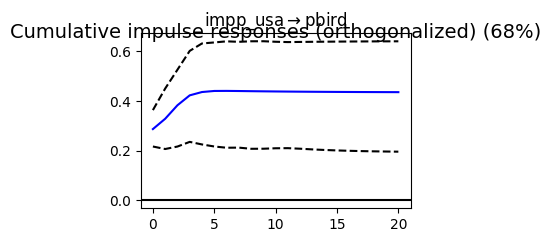

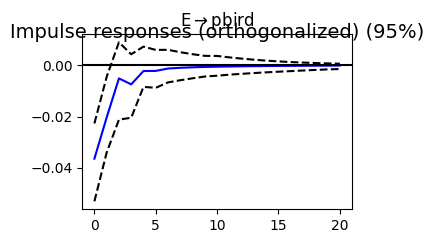

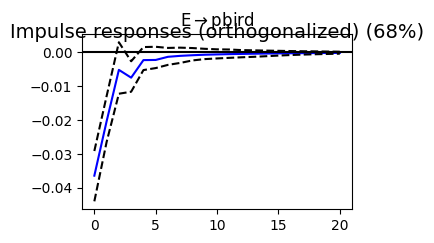

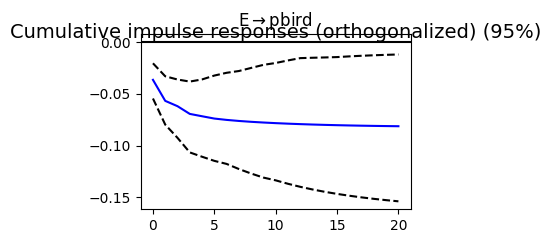

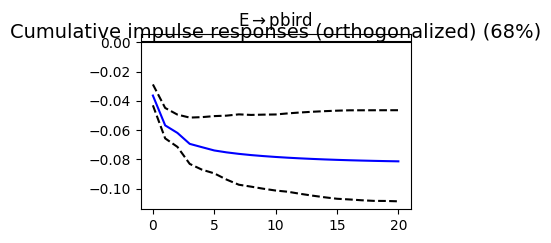

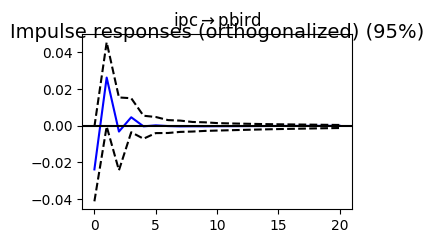

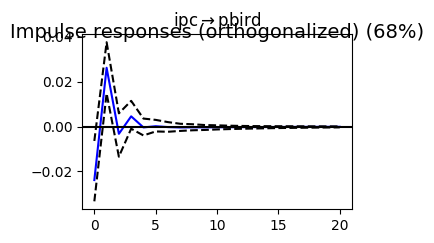

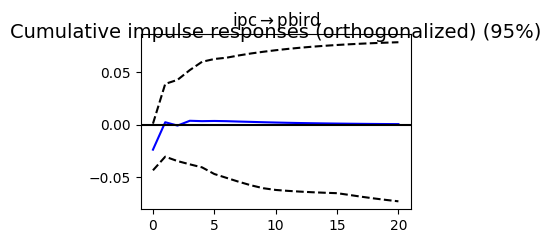

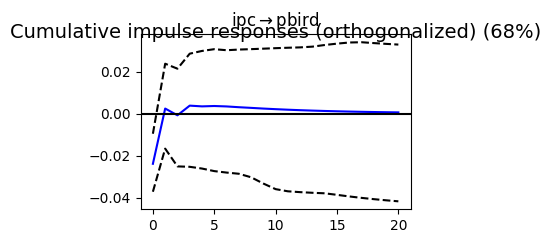

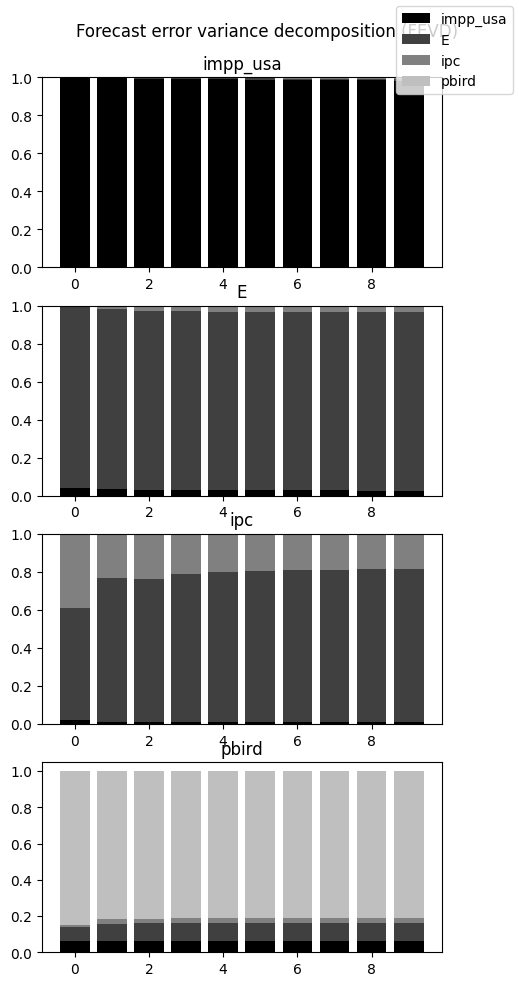

In [8]:
if regression.REGRESS_MODEL == "VAR":
    regress(["impp_usa", "E", "ipc", "pbird"], df_ERPT_Arg, maxlags=2, max_horizon=20) 
elif regression.REGRESS_MODEL == "LocalProjections":
    regress(endog=["E","ipc","pbird"], data=df_ERPT_Arg, exog=["Pmaíz_USA"], maxlags=3, newey_lags=4, max_horizon=20, run_other_tests_on=False)